In [1]:
!pip install kaggle



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import os
import shutil

# Replace with the path to where your kaggle.json is downloaded
source = os.path.expanduser("~/Desktop/kaggle.json")
destination = os.path.expanduser("~/.kaggle/kaggle.json")

# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.dirname(destination), exist_ok=True)

# Move the file
shutil.move(source, destination)

# Set proper file permissions
os.chmod(destination, 0o600)

print("kaggle.json moved and permissions set successfully.")

kaggle.json moved and permissions set successfully.


In [11]:
!kaggle datasets download -d zahidmughal2343/amazon-sales-2025

Dataset URL: https://www.kaggle.com/datasets/zahidmughal2343/amazon-sales-2025
License(s): apache-2.0
  0%|                                               | 0.00/3.53k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.53k/3.53k [00:00<00:00, 6.29MB/s]


In [13]:
import zipfile
with zipfile.ZipFile("amazon-sales-2025.zip","r") as zip_ref:
    zip_ref.extractall("amazon")

In [15]:
print(os.listdir("amazon"))

['amazon.csv', 'amazon_sales_data 2025.csv']


In [21]:
import pandas as pd

df=pd.read_csv("amazon/amazon_sales_data 2025.csv") #load data
df.head(5)


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


#  Data Cleaning & Preparation

In [29]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%y", errors="coerce")


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           250 non-null    object        
 1   Date               250 non-null    datetime64[ns]
 2   Product            250 non-null    object        
 3   Category           250 non-null    object        
 4   Price              250 non-null    int64         
 5   Quantity           250 non-null    int64         
 6   Total Sales        250 non-null    int64         
 7   Customer Name      250 non-null    object        
 8   Customer Location  250 non-null    object        
 9   Payment Method     250 non-null    object        
 10  Status             250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.6+ KB


In [33]:

df.describe()

,Date,Price,Quantity,Total Sales
count,250,250.000000,250.000000,250.000000
mean,2025-04-18 05:51:21.600000,343.580000,2.856000,975.380000
min,2025-01-03 00:00:00,15.000000,1.000000,15.000000
25%,2025-02-24 00:00:00,40.000000,2.000000,100.000000
50%,2025-03-19 00:00:00,150.000000,3.000000,400.000000
75%,2025-05-02 18:00:00,600.000000,4.000000,1500.000000
max,2025-12-03 00:00:00,1200.000000,5.000000,6000.000000
std,NaN,380.635808,1.429489,1252.112254


# Exploratory Data Analysis (EDA)

<Axes: xlabel='Category', ylabel='count'>

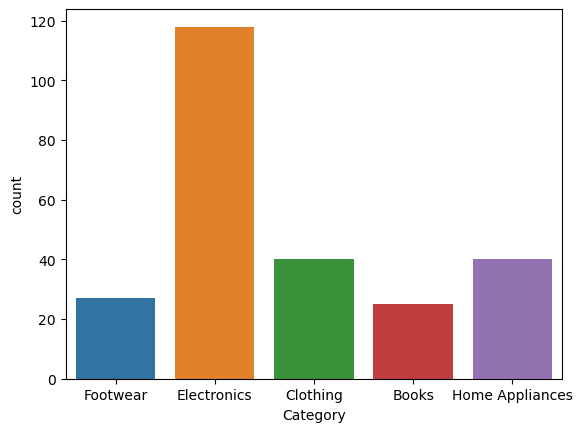

In [63]:
import seaborn as sns
sns.countplot(x="Category", data=df)



([<matplotlib.patches.Wedge at 0x179567950>,
 [Text(0.4932215435906338, 0.9832255636109513, 'Completed'),
  Text(-1.0895075683798439, -0.15156931893704545, 'Pending'),
  Text(0.6239958487890805, -0.9058858541195989, 'Cancelled')],
 [Text(0.2690299328676184, 0.5363048528787007, '35.20'),
  Text(-0.5942768554799148, -0.08267417396566114, '34.00'),
  Text(0.34036137206677114, -0.4941195567925084, '30.80')])

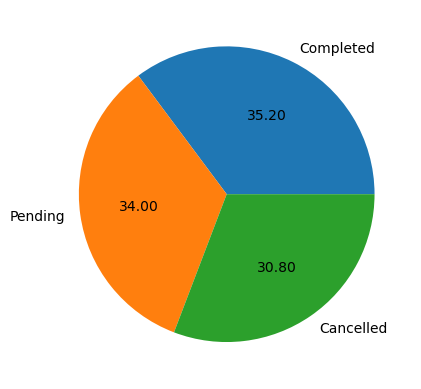

In [65]:
plt.pie(df["Status"].value_counts().values , labels=df["Status"].value_counts().index , autopct='%.2f')


<Axes: xlabel='Customer Location', ylabel='count'>

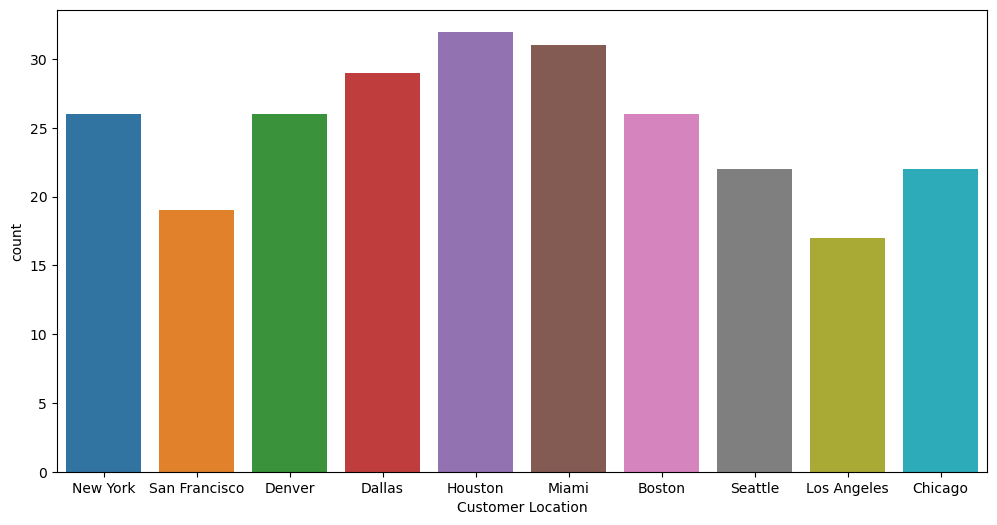

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x="Customer Location", data=df

# The Location with highest number of our customer is "Houston"

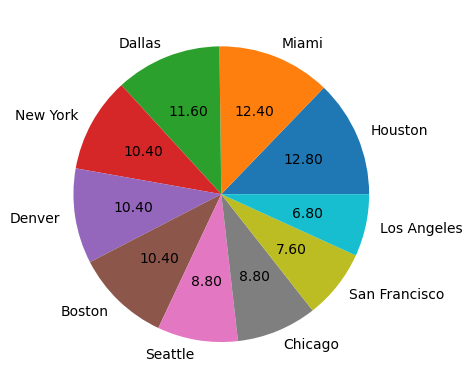

In [59]:
plt.pie(df["Customer Location"].value_counts().values , labels=df["Customer Location"].value_counts().index , autopct='%.2f')
plt.show()

<Axes: xlabel='Payment Method', ylabel='count'>

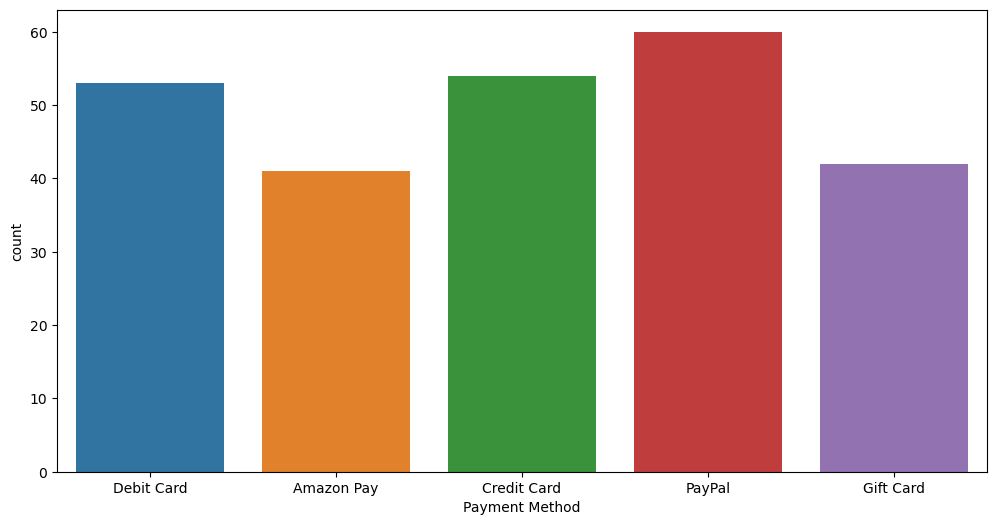

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x="Payment Method", data=df)


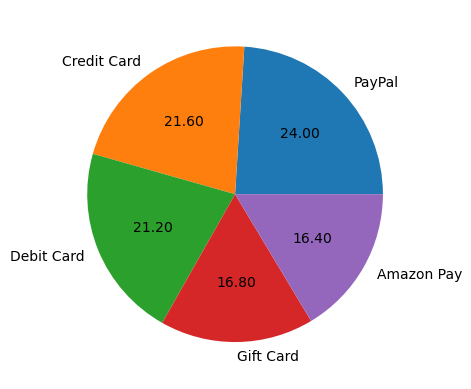

In [71]:
plt.pie(df["Payment Method"].value_counts().values , labels=df["Payment Method"].value_counts().index , autopct='%.2f')
plt.show()

In [73]:
print("Total Sales : " , df["Total Sales"].sum())
print("Total Sales of Footwear : ",df.loc[df["Category"] == "Footwear", "Total Sales"].sum())
print("Total Sales of Electronics : ",df.loc[df["Category"] == "Electronics", "Total Sales"].sum())
print("Total Sales of Clothing : ",df.loc[df["Category"] == "Clothing", "Total Sales"].sum())
print("Total Sales of Books : ",df.loc[df["Category"] == "Books", "Total Sales"].sum())
print("Total Sales of Home Appliances : ",df.loc[df["Category"] == "Home Appliances", "Total Sales"].sum())

Total Sales :  243845
Total Sales of Footwear :  4320
Total Sales of Electronics :  129950
Total Sales of Clothing :  3540
Total Sales of Books :  1035
Total Sales of Home Appliances :  105000


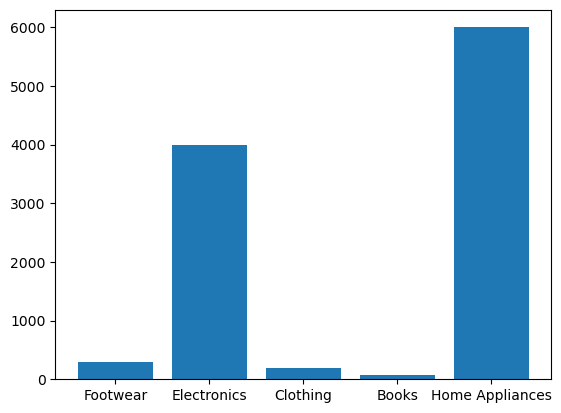

In [75]:
plt.bar(df['Category'] , height =df["Total Sales"] )
plt.show()

#  Electronics dominate in order volume, while Home Appliances generate the highest revenue.

<Axes: title={'center': 'Total Sales by Date'}, xlabel='Date', ylabel='Total Sales'>

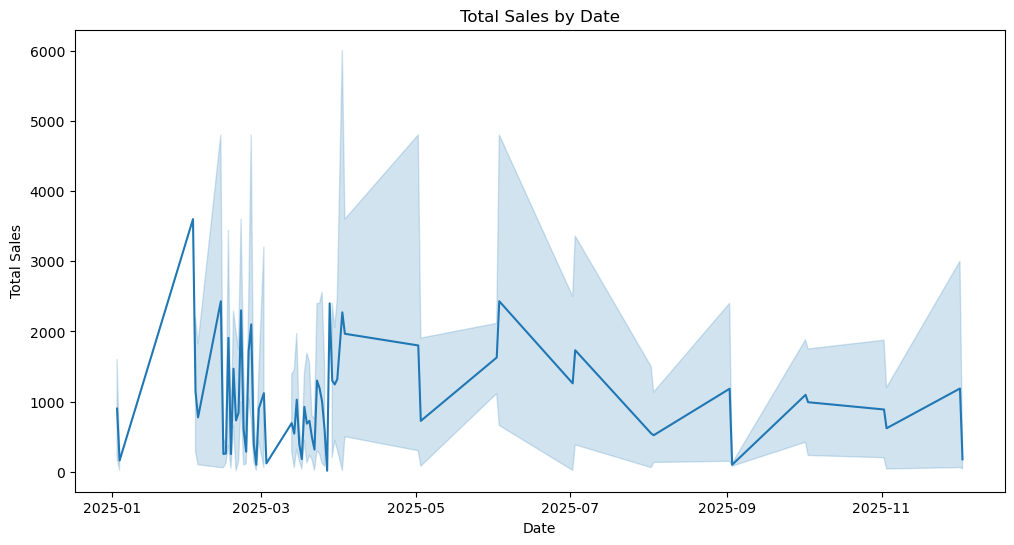

In [77]:
plt.figure(figsize=(12,6))
plt.title("Total Sales by Date")
pd.option_context('mode.use_inf_as_na', True)
sns.lineplot(x= df["Date"], y = df["Total Sales"])

# Conclusion

- The sales analysis highlights clear trends in customer preferences and business performance.

- Electronics dominate in order volume, while Home Appliances generate the highest revenue. Houston and Miami stand out as the most profitable locations, and PayPal remains the top payment choice.

- However, the high cancellation rate (around one-third of all orders) indicates a need for operational improvements, such as better inventory management, shipping reliability, or customer service.

- Seasonal peaks suggest that targeted promotions during high-demand periods could further boost sales.